In [1]:
# Make maps of ensembles of runs with the same IC for exf variables
# Plots ensemble mean and the anomalies in each run relative to the EM
# Option to select time averaging over all time points or just one year

In [1]:
# from matplotlib import pyplot as plt
import numpy as np
import Functions_data_analysis as fda
import Functions_plotting as fp
import xarray as xr
from Datasets import exp_set_dict_warm_order, exp_set_dict_wind_order

In [2]:
# Use importlib to reload modules after editing them
import importlib
importlib.reload(fp)

<module 'Functions_plotting' from '/glade/campaign/univ/ulnl0002/Gemma/Analysis/Functions_plotting.py'>

In [3]:
# Configure data and plotting options

exp_set = 'ic_1995'
# region = 'AS_long'
region = 'AS_near'
# region = 'full_model_domain'

# Times over which to average:
# 'all' selected times or enter int for year avg
# time_mean = 'all'
time_mean = 1995

# How many months of data to retrieve (from the first February of data)
n_months = 12

# Whether to plot in order of warm to cool or westerly to easterly
# runs = exp_set_dict_warm_order[exp_set]
runs = exp_set_dict_warm_order[exp_set]
print('Using the following experiments in this order:\n',runs)

Using the following experiments in this order:
 ['run_forc_erai_1982_rep_ic_1995', 'run_forc_erai_1984_rep_ic_1995', 'run_forc_erai_1989_rep_ic_1995', 'run_forc_erai_1992_rep_ic_1995', 'run_forc_erai_1994_rep_ic_1995', 'run_forc_erai_2003_rep_ic_1995', 'run_forc_erai_2009_rep_ic_1995', 'run_forc_erai_2011_rep_ic_1995', 'run_forc_erai_2015_rep_ic_1995', 'run_forc_erai_1991_rep_ic_1995']


In [4]:
# Load datasets as an ensemble 

prefix = 'EXF_forcing_set2' 
all_run_uwind_da = fda.get_ensemble_data_for_ic('uwind', runs, region, prefix, n_months = n_months) 
all_run_vwind_da = fda.get_ensemble_data_for_ic('vwind', runs, region, prefix, n_months = n_months) 

print('Data retrieved!')

Getting uwind data for all runs...
0
saving date from these times for 1st run:
 [cftime.DatetimeNoLeap(1995, 2, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1995, 3, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1995, 4, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1995, 5, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1995, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1995, 7, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1995, 8, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1995, 9, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1995, 10, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1995, 11, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1995, 12, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1996, 1, 1, 0, 0, 0, 0, has_year_zero=True)]
(12, 254, 300)
lat shape, data lat shape: 254 254
lon shape, data lon shape: 300 300
1
(12, 254, 300)
2
(12, 254

In [5]:
# Average data and ensemble mean over specified time or over all times

# Select times to average over
if time_mean == 'all':
    uwind_ens_data = all_run_uwind_da
    vwind_ens_data = all_run_vwind_da
    
    # Get averages
    uwind_em = uwind_ens_data.mean(dim = 'run')
    uwind_em_time_avg = uwind_mean.mean(dim = 'time')
    vwind_em = vwind_ens_data.mean(dim = 'run')
    vwind_em_time_avg = vwind_mean.mean(dim = 'time')
    
    
elif type(time_mean) == int:
    # Just use one year of winds since they should all be the same
    uwind_ens_data = all_run_uwind_da.sel(time = str(time_mean))
    vwind_ens_data = all_run_vwind_da.sel(time = str(time_mean))
    
    # Get averages
    uwind_em = uwind_ens_data.mean(dim = 'run')
    uwind_em_time_avg = uwind_em.mean(dim = 'time')
    vwind_em = vwind_ens_data.mean(dim = 'run')
    vwind_em_time_avg = vwind_em.mean(dim = 'time')    


uwind_time_avg = uwind_ens_data.mean(dim='time')  #(n_runs,n_lats,n_lons)
uwind_anom = uwind_time_avg - uwind_em_time_avg #shape (n_lats,n_lons)
vwind_time_avg = vwind_ens_data.mean(dim='time')
vwind_anom = vwind_time_avg - vwind_em_time_avg



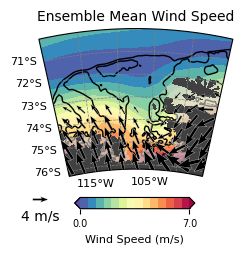

In [6]:
# Plot velocity magnitudes in colors and quivers
importlib.reload(fp)
# figname = 'Plots/Figure_wind_maps_annual_mean_ens_mean_'+region+'.png'
figname = None
if time_mean == 'all' or type(time_mean)==int:

    mag_em_levs = np.linspace(0,7,15)
    mag_em = (uwind_em_time_avg ** 2 + vwind_em_time_avg ** 2) ** 0.5
    
    mag_em_masked = mag_em.where(mag_em > 2)
    uwind_em_masked = uwind_em_time_avg.where(mag_em > 2)
    vwind_em_masked = vwind_em_time_avg.where(mag_em > 2)

    # Plot ensemble mean
    fp.make_contour_map('wind', mag_em, mag_em_levs,'Spectral_r',region,
                        title='Ensemble Mean Wind Speed',save=figname,
                        data_x=uwind_em_masked, data_y=vwind_em_masked,vec_len=4)


In [7]:
# Calculate magnitudes in ensemble members

if time_mean == 'all' or type(time_mean)==int:
    
    mag_anom_levs = np.linspace(0,2.2,15)
    # calc mag for each run
    mag_ens_data = []
    for i in range(len(uwind_anom)):
        mag_i = (uwind_anom[i] ** 2 + vwind_anom[i] ** 2) ** 0.5
        mag_ens_data.append(mag_i)
    mag_ens_da = xr.concat(mag_ens_data,dim='run')

0
1
2
3
4
5
6
7
8
9


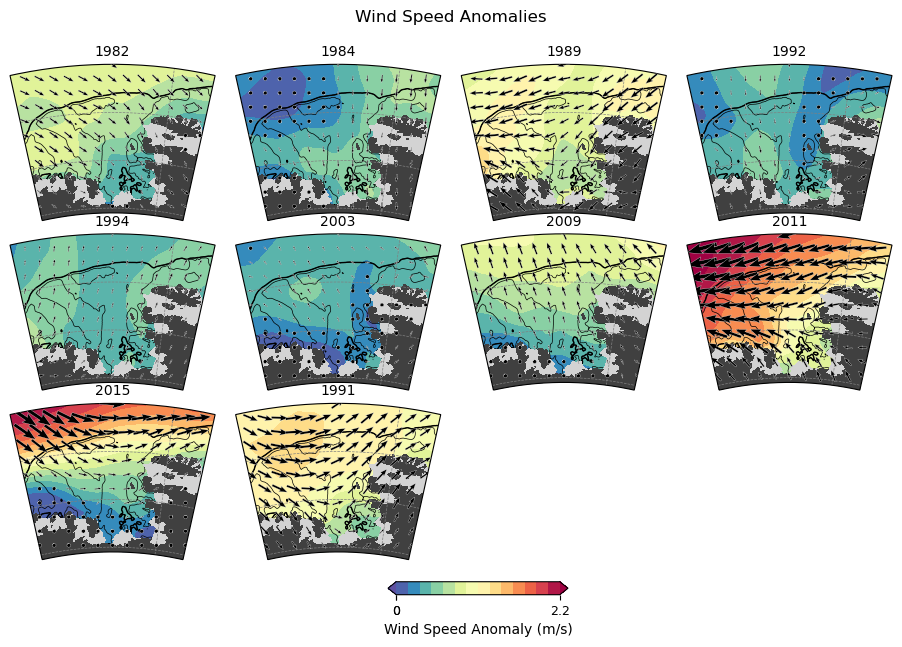

In [8]:
# Plot full ensemble maps with option to plot composites
importlib.reload(fp)

save = False
plot_composites = False

if plot_composites:
    if save:
        figname = 'Plots/Figure_wind_mag_maps_with_composites_'+region+'.png'
        fp.make_ensemble_subplots_with_composites('wind_mag', mag_ens_da, mag_anom_levs, 'Spectral_r',region,'Wind Speed Anomalies',\
                                                  data_x=uwind_anom, data_y=vwind_anom,save=figname)
    else:
        fp.make_ensemble_subplots_with_composites('wind_mag', mag_ens_da, mag_anom_levs, 'Spectral_r',region,'Wind Speed Anomalies',\
                                                 data_x=uwind_anom, data_y=vwind_anom)

else:
    if save:
        figname = 'Plots/Figure_wind_mag_maps_'+region+'.png'
        fp.make_ensemble_subplots('wind_mag', mag_ens_da, mag_anom_levs, 'Spectral_r',region,'Wind Speed Anomalies',\
                               data_x=uwind_anom, data_y=vwind_anom,save=figname)
    else:
        fp.make_ensemble_subplots('wind_mag', mag_ens_da, mag_anom_levs, 'Spectral_r',region,'Wind Speed Anomalies',\
                               data_x=uwind_anom, data_y=vwind_anom)



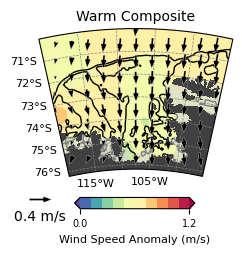

In [9]:
# Plot warm composite
warm_comp = mag_ens_da[0:4].mean(dim='run')
warm_comp_x = uwind_anom[0:4].mean(dim='run')
warm_comp_y = vwind_anom[0:4].mean(dim='run')

importlib.reload(fp)
fp.make_contour_map('wind_mag_comp', warm_comp, np.linspace(0,1.2,11),'Spectral_r',region,
                        title='Warm Composite',
                        data_x=warm_comp_x, data_y=warm_comp_y,vec_len=0.4)

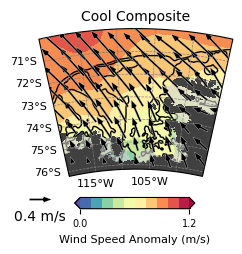

In [8]:
# Plot cool composite
cool_comp = mag_ens_da[4:8].mean(dim='run')
cool_comp_x = uwind_anom[4:8].mean(dim='run')
cool_comp_y = vwind_anom[4:8].mean(dim='run')

fp.make_contour_map('wind_mag_comp', cool_comp, np.linspace(0,1.2,11),'Spectral_r',region,
                        title='Cool Composite',
                        data_x=cool_comp_x, data_y=cool_comp_y,vec_len=0.4)

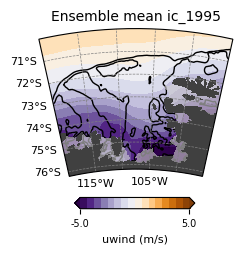

In [72]:
# Plot UWind ensemble mean (


# Set up contour levels for EM and full ensemble plots
uwind_em_levs = np.linspace(-5,5,17)
uwind_anom_levs = np.linspace(-3,3,17)

# Plot ensemble mean
fp.make_contour_map('uwind', uwind_em_time_avg, uwind_em_levs, 'PuOr_r',region,title='Ensemble mean '+exp_set,save=None)

# Uncomment to save
figname = 'Plots/Figure_uwind_EM_map_ic_'+exp_set+'.png'
# fp.make_ensemble_mean_plot('uwind', uwind_time_avg_mean, uwind_em_levs, 'PuOr_r',region,save=figname)


In [76]:
# Starting from here, these are slightly broken (1/22/24)
#----------------------------------------------
# Plot uwind all members

fp.make_ensemble_subplots('uwind', uwind_time_avg, uwind_ens_data, uwind_em_levs, uwind_anom_levs, 'PuOr_r',region)

figname = 'Plots/Figure_uwind_maps_ic_'+exp_set+'.png'
# fp.make_ensemble_subplots('uwind', uwind_time_avg_mean, uwind_ens_data,uwind_em_levs, uwind_anom_levs, 'PuOr_r',region,save=figname)

# Plot vwind em

vwind_em_levs = np.linspace(-3,3,17)
vwind_anom_levs = np.linspace(-0.8,0.8,17)

# Plot without saving
fp.make_contour_map('vwind', vwind_time_avg,  vwind_em_levs, 'PiYG_r',region,title='Ensemble mean '+exp_set,save=None)

# Uncomment to save
figname = 'Plots/Figure_vwind_EM_map_ic_'+iexp_set+'.png'
# fp.make_ensemble_mean_plot('vwind', vwind_time_avg_mean,  vwind_em_levs, 'PiYG_r',region,save=figname)


# Plot without saving
fp.make_ensemble_subplots('vwind', vwind_time_avg, vwind_ens_data,vwind_em_levs, vwind_anom_levs, 'PiYG_r',region,save=None)

# Uncomment to save
figname = 'Plots/Figure_vwind_maps_ic_'+exp_set+'.png'
# fp.make_ensemble_subplots('vwind', vwind_time_avg_mean, vwind_ens_data,vwind_em_levs, vwind_anom_levs, 'PiYG_r',region,save=figname)



TypeError: unhashable type: 'numpy.ndarray'

In [17]:
if time_mean == 'season':

    yr1 = str(exp_set.split('_')[-1])
    yr2 = str(int(exp_set.split('_')[-1])+1)
    djf_ens_u = all_run_uwind_da.sel(time = slice(yr1+'-12',yr2+'-02'))
    djf_ens_v = all_run_vwind_da.sel(time = slice(yr1+'-12',yr2+'-02'))
    mam_ens_u = all_run_uwind_da.sel(time = slice(yr1+'-03',yr1+'-05'))
    mam_ens_v = all_run_vwind_da.sel(time = slice(yr1+'-03',yr1+'-05'))
    jja_ens_u = all_run_uwind_da.sel(time = slice(yr1+'-06',yr1+'-08'))
    jja_ens_v = all_run_vwind_da.sel(time = slice(yr1+'-06',yr1+'-08'))
    son_ens_u = all_run_uwind_da.sel(time = slice(yr1+'-09',yr1+'-11'))
    son_ens_v = all_run_vwind_da.sel(time = slice(yr1+'-09',yr1+'-11'))
    
season_ens_u_list = [djf_ens_u,mam_ens_u,jja_ens_u,son_ens_u]
season_ens_v_list = [djf_ens_v,mam_ens_v,jja_ens_v,son_ens_v]
seasons = ['DJF','MAM','JJA','SON']
season_mean_u = {} #ensemble mean dict
season_ens_u = {} #dict with data containing all runs (just populates above list as a dict)
season_mean_v = {}
season_ens_v = {}

for u,v,seas in zip(season_ens_u_list,season_ens_v_list,seasons):
    # Get averages
    uwind_mean = u.mean(dim = 'run')
    uwind_time_avg_mean = uwind_mean.mean(dim = 'time')
    season_mean_u[seas] = uwind_time_avg_mean
    season_ens_u[seas] = u
    
    vwind_mean = v.mean(dim = 'run')
    vwind_time_avg_mean = vwind_mean.mean(dim = 'time')
    season_mean_v[seas] = vwind_time_avg_mean
    season_ens_v[seas] = v

In [18]:
# Get ensemble mean of warmest runs
warm_run_idxs = [0,2,4,5]
warm_run_ens_u = season_ens_u['DJF'].isel(run=warm_run_idxs)
print('Using these runs as warm ensemble:')
print(warm_run_ens_u.run)
warm_run_mean_u = warm_run_ens_u.mean(dim='run')

Using these runs as warm ensemble:
<xarray.DataArray 'run' (run: 4)>
array(['run_forc_erai_2015_rep_ic_2001', 'run_forc_erai_1982_rep_ic_2001',
       'run_forc_erai_1992_rep_ic_2001', 'run_forc_erai_1984_rep_ic_2001'],
      dtype='<U30')
Coordinates:
  * run      (run) <U30 'run_forc_erai_2015_rep_ic_2001' ... 'run_forc_erai_1...


Using these runs as warm ensemble:
<xarray.DataArray 'run' (run: 4)>
array(['run_forc_erai_2015_rep_ic_2001', 'run_forc_erai_1982_rep_ic_2001',
       'run_forc_erai_1992_rep_ic_2001', 'run_forc_erai_1984_rep_ic_2001'],
      dtype='<U30')
Coordinates:
  * run      (run) <U30 'run_forc_erai_2015_rep_ic_2001' ... 'run_forc_erai_1...
0
1
2
3
4
5
6
7
8
9
<xarray.DataArray 'run' (run: 4)>
array(['run_forc_erai_2015_rep_ic_2001', 'run_forc_erai_1982_rep_ic_2001',
       'run_forc_erai_1992_rep_ic_2001', 'run_forc_erai_1984_rep_ic_2001'],
      dtype='<U30')
Coordinates:
  * run      (run) <U30 'run_forc_erai_2015_rep_ic_2001' ... 'run_forc_erai_1...


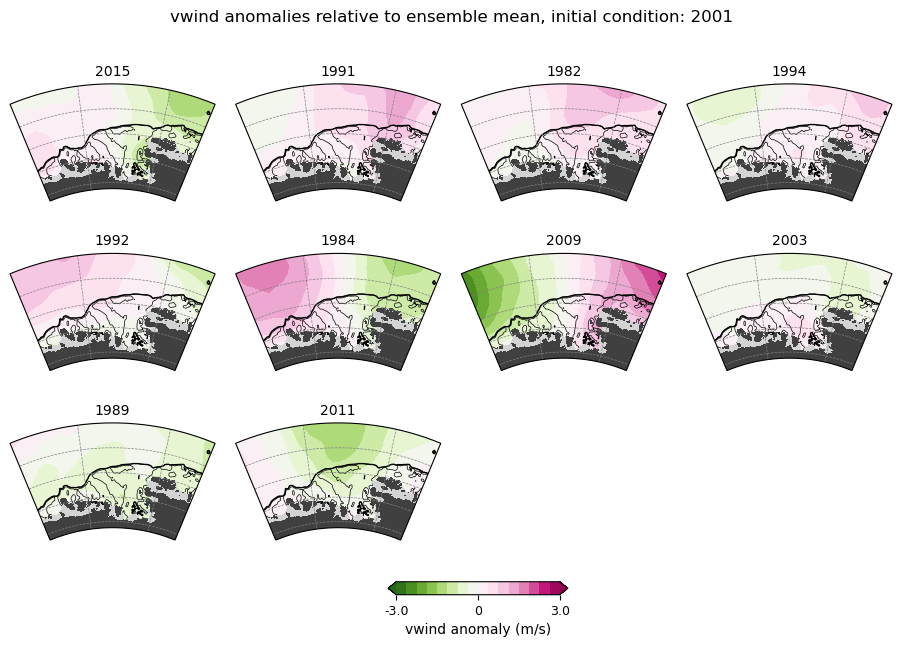

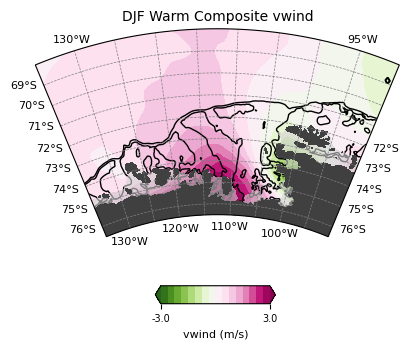

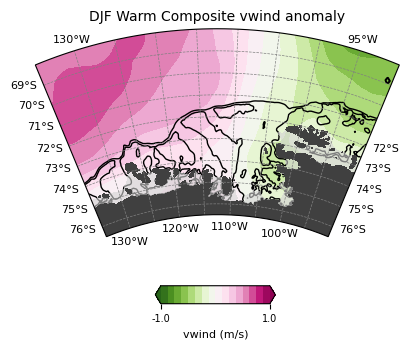

In [22]:
plot_season = 'DJF'

comp_levs = np.linspace(-3,3,17)
comp_anom_levs = np.linspace(-1,1,17)
ens_anom_levs = np.linspace(-3,3,17)

if time_mean == 'season':
    
    #U wind----------------------
    
    #plot u ensemble
    # fp.make_ensemble_subplots('uwind', season_mean_u[plot_season], season_ens_u[plot_season],comp_levs, anom_levs, 'PuOr_r',region,save=None)
    
    # Plot warm run composite U
    warm_run_idxs = [0,2,4,5]
    warm_run_ens_u = season_ens_u[plot_season].isel(run=warm_run_idxs)
    print('Using these runs as warm ensemble:')
    print(warm_run_ens_u.run)
    warm_run_mean_u = warm_run_ens_u.mean(dim='run')
    warm_run_mean_u = warm_run_mean_u.mean(dim='time')
    # fp.make_contour_map('uwind', warm_run_mean_u,  comp_levs, 'PuOr_r',region,title=plot_season+' Warm Composite uwind',save=None)

    # Plot warm run composite anomalies (warm U minus ensemble mean U)
    warm_run_mean_u_anom = warm_run_mean_u - season_mean_u[plot_season]
    # fp.make_contour_map('uwind', warm_run_mean_u_anom,  comp_anom_levs, 'PuOr_r',region,title=plot_season+' Warm Composite uwind anomaly',save=None)
    
    #V wind----------------------
    
    # Plot v ensemble
    fp.make_ensemble_subplots('vwind', season_mean_v[plot_season], season_ens_v[plot_season],ens_anom_levs, ens_anom_levs, 'PiYG_r',region,save=None)
    
    # Plot warm run composite V
    warm_run_ens_v = season_ens_v[plot_season].isel(run=warm_run_idxs)
    print(warm_run_ens_v.run)
    warm_run_mean_v = warm_run_ens_v.mean(dim='run')
    warm_run_mean_v = warm_run_mean_v.mean(dim='time')
    fp.make_contour_map('vwind', warm_run_mean_v,  comp_levs, 'PiYG_r',region,title=plot_season+' Warm Composite vwind',save=None)

    # Plot warm run composite anomalies (warm v minus ensemble mean v)
    warm_run_mean_v_anom = warm_run_mean_v - season_mean_v[plot_season]
    fp.make_contour_map('vwind', warm_run_mean_v_anom,  comp_anom_levs, 'PiYG_r',region,title=plot_season+' Warm Composite vwind anomaly',save=None)
    

